In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle

pickle_in = open('/content/drive/MyDrive/ML_Results/Preprocessing/X_ANN_Img_Pre.pickle','rb')
X = np.array(pickle.load(pickle_in))
pickle_in.close()

pickle_in = open('/content/drive/MyDrive/ML_Results/Preprocessing/Y_ANN_Img_Pre.pickle','rb')
Y = np.array(pickle.load(pickle_in))
pickle_in.close()

print("Number of images in dataset: " ,len(X))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

image_size = X_train.shape[1]
input_size = image_size
print("Number of features in image: ", input_size)

X_train=np.reshape(X_train, [-1,input_size])
X_train=X_train.astype('float32')/255

X_test=np.reshape(X_test, [-1,input_size])
X_test=X_test.astype('float32')/255

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/ML_Results_Main/ANN_Img_weights.h5", verbose=1, save_best_only=True)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 512,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 256,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 128,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='linear'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history = ann.fit(X_train, y_train, epochs = 20, batch_size=80, validation_split = 0.2, callbacks=[checkpoint])

loss, acc = ann.evaluate(X_test,y_test)

print()
print("Loss: ", loss)
print("Accuracy: ", acc)

Number of images in dataset:  12540
Number of features in image:  14400
Epoch 1/20
100/101 [============================>.] - ETA: 0s - loss: 0.1710 - accuracy: 0.7751
Epoch 00001: val_loss improved from inf to 0.16454, saving model to /content/drive/MyDrive/ML_Results_Main/ANN_Img_weights.h5
101/101 [==============================] - 10s 98ms/step - loss: 0.1707 - accuracy: 0.7755 - val_loss: 0.1645 - val_accuracy: 0.7788
Epoch 2/20
100/101 [============================>.] - ETA: 0s - loss: 0.1308 - accuracy: 0.8226
Epoch 00002: val_loss did not improve from 0.16454
101/101 [==============================] - 7s 73ms/step - loss: 0.1309 - accuracy: 0.8226 - val_loss: 0.1763 - val_accuracy: 0.7638
Epoch 3/20
101/101 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.8714
Epoch 00003: val_loss did not improve from 0.16454
101/101 [==============================] - 8s 75ms/step - loss: 0.1011 - accuracy: 0.8714 - val_loss: 0.1864 - val_accuracy: 0.7887
Epoch 4/20
100/

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (
    ann, classification_report(y_test, y_pred)))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7fcc9840c250>:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       802
           1       0.82      0.90      0.86      1706

    accuracy                           0.80      2508
   macro avg       0.78      0.75      0.76      2508
weighted avg       0.80      0.80      0.80      2508




In [ ]:
################# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[ 472  330]
 [ 166 1540]]

Model accuracy:  0.8022328548644339


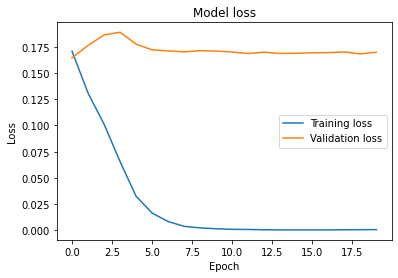

In [ ]:
################### Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='center right')
plt.show()

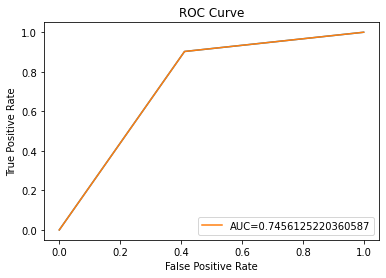

In [ ]:
################## ROC Curve
y_pred = y_pred.ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Prediction result:  [[ True]]


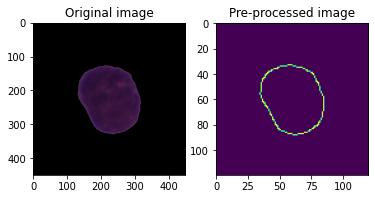

In [ ]:
##################### To predict from validation images
import tensorflow as tf
import cv2
import matplotlib.image as mpimg

model = tf.keras.models.load_model("/content/drive/MyDrive/ML_Results_Main/ANN_Img_80.2")

figure, axis = plt.subplots(1, 2)

def ANN_img_preprocessing(img):
  image = cv2.imread(img)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resized_gray = cv2.resize(gray, (120,120))
  edged_gray = cv2.Canny(resized_gray, 100, 200)

  axis[1].imshow(edged_gray)
  axis[1].set_title("Pre-processed image")
  
  edged_gray = np.array(edged_gray).flatten()
  return edged_gray

PATH = "/content/drive/MyDrive/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/202.bmp"


img = mpimg.imread(PATH)
axis[0].imshow(img)
axis[0].set_title("Original image")

fileimg = ANN_img_preprocessing(PATH)

fileimg = np.reshape(fileimg, [-1,input_size])
fileimg = fileimg.astype('float32')/255

y_pred = model.predict(fileimg)
y_pred = (y_pred > 0.5)

print("Prediction result: ", y_pred)

In [ ]:
ann.save("/content/drive/MyDrive/ML_Results_Main/ANN_Img_80.2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_Results_Main/ANN_Img_80.2/assets
